<a href="https://colab.research.google.com/github/2jeonghoon/LinearAlgebra/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

lamen = dict({'name':['쇠고기라면', '해물라면', '얼큰라면', '떡라면', '짬뽕라면', '만두라면', '치즈라면', '된장라면', '볶음라면', '김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})

lamen

lamen1 = pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


In [13]:
lamenEval = lamen1[['noodle', 'bowl', 'soup']]
lamenName = lamen1['name']

scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape

from sklearn.decomposition import PCA

pca_lamen = PCA()
pca_lamen.fit(lamen_scaled)

X_pca_lamen = pca_lamen.transform(lamen_scaled)

print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data : {}".format(str(X_pca_lamen.shape)))

original data : (10, 3)
transform data : (10, 3)


In [14]:
pca_lamen.components_

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

In [17]:
pc1 = 0
pc2 = 0
pc3 = 0

for j in range(len(pca_lamen.components_)) :
  pc1 += pca_lamen.components_[0][j]*lamen_scaled[:,j]
  pc2 += pca_lamen.components_[1][j]*lamen_scaled[:,j]
  pc3 += pca_lamen.components_[2][j]*lamen_scaled[:,j]

pc1 = pc1.reshape(10,1)
pc2 = pc2.reshape(10,1)
pc3 = pc3.reshape(10,1)

np.round(np.hstack((pc1, pc2, pc3)), 3) == np.round(X_pca_lamen, 3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

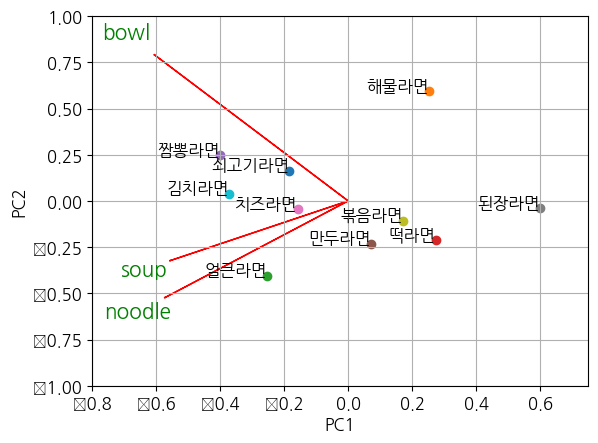

In [25]:
def biplot2(score, coeff, label, pcax, pcay, labels=None) :
  pca1 = pcax-1
  pca2 = pcay-1

  xs = score[:, pca1]
  ys = score[:, pca2]

  n = score.shape[1]

  scalex = 1.0/(xs.max()-xs.min())
  scaley = 1.0/(ys.max()-ys.min())

  for i in range(len(xs)) :
    plt.scatter(xs[i]*scalex, ys[i]*scaley)
    plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley), ha='right')

  for i in range(n) :
    plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2], color='r', alpha=1)
    if labels is None :
      plt.text(coeff[i, pca1]*1.15, coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else :
      plt.text(coeff[i, pca1]*1.15, coeff[i,pca2]*1.15, labels[i], color='g', ha='center', va='center', size=15)
    plt.xlim(-0.8, 0.75)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

#path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
#font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
#plt.rc('font', family=font_name)

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설정

#plt.rc('font', family='NanumBarunGothic')
%matplotlib inline
biplot2(X_pca_lamen, pca_lamen.components_, lamenName, 1, 2, labels=lamenEval.columns)
